In [1]:
pip install nolds

In [2]:
## Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
## Import packages
from scipy.io import loadmat
import nolds
import numpy as np
from sklearn import preprocessing
from tabulate import tabulate
from matplotlib import pyplot as plt

In [4]:
## Import data
img = loadmat('/content/drive/My Drive/Major_Project/Indian_pines_corrected.mat')
img_gt = loadmat('/content/drive/My Drive/Major_Project/Indian_pines_gt.mat')
img = img['indian_pines_corrected']
img_gt = img_gt['indian_pines_gt']
height, width, bands = img.shape[0], img.shape[1], img.shape[2]

img = np.reshape(img, [height*width, bands])
img_gt = np.reshape(img_gt, [height*width,])
img = preprocessing.normalize(img.astype('float32'))
num_classes = len(np.unique(img_gt))

print("Number of Classes: ", num_classes)

Number of Classes:  17


In [5]:
## Preprocesses
class_dist = [] #Store each class indexes
for i in range(1, num_classes):
    class_index = np.nonzero(img_gt == i)[0].tolist()
    print(class_index)
    class_dist.append(class_index) 

[9376, 9521, 9522, 9666, 9667, 9668, 9811, 9812, 9813, 9814, 9956, 9957, 9958, 9959, 9960, 10101, 10102, 10103, 10104, 10105, 10106, 10246, 10247, 10248, 10249, 10250, 10251, 10391, 10392, 10393, 10394, 10395, 10396, 10535, 10536, 10537, 10538, 10539, 10540, 10541, 10683, 10684, 10685, 10686, 10830, 10831]
[2470, 2471, 2472, 2473, 2474, 2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2615, 2616, 2617, 2618, 2619, 2620, 2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2905, 2906, 2907, 2908, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919, 2920, 2921, 2922, 2923, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3195, 3196, 3197, 3198, 3199, 3200, 3201, 3202, 3203, 3204, 3205, 3206, 3207, 3208, 3209, 3210, 3211, 3212, 3213, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3350, 3351, 3352, 3

In [9]:
## Main
x = img[class_dist[0][0],]
print(x.shape)
h = nolds.corr_dim(x,1)
print("Original SRC dimension: ", x.shape)
print("Original Fractal Dimesion of SRC: ", h)
table = [] # Initialize data storing table
diff = np.arange(bands*bands*1.0).reshape((bands, bands))*0 + 1 # initialize difference storage var
band_updated = bands


for i in range(bands-5):
  # Iterating after removal of one band with min Fractal change
  for j in range(band_updated):
    # Iterating to find band with min Fractal change
    h = nolds.corr_dim(x,1)
    x1 = np.delete(x, j)
    h1 = nolds.corr_dim(x1,1)
    diff[i,j] = abs(h1-h)
  min_index_col = np.argmin(diff[i,], axis=0)
  table.append([ i, diff[i,min_index_col], min_index_col, x.shape])
  print(x.shape)
  print(min_index_col)
  x = np.delete(x, min_index_col)
  band_updated = band_updated - 1

(200,)
Original SRC dimension:  (200,)
Original Fractal Dimesion of SRC:  0.5020054282611301
(200,)
129
(199,)
119
(198,)
47
(197,)
38
(196,)
112
(195,)
50
(194,)
193
(193,)
107
(192,)
75
(191,)
122
(190,)
41
(189,)
120
(188,)
42
(187,)
37
(186,)
40
(185,)
44
(184,)
38
(183,)
38
(182,)
89
(181,)
40
(180,)
41
(179,)
40
(178,)
36
(177,)
38
(176,)
121
(175,)
121
(174,)
173
(173,)
172
(172,)
108
(171,)
170
(170,)
119
(169,)
67
(168,)
79
(167,)
98
(166,)
165
(165,)
68
(164,)
103
(163,)
31
(162,)
161
(161,)
59
(160,)
9
(159,)
67
(158,)
9
(157,)
72
(156,)
42
(155,)
46
(154,)
121
(153,)
60
(152,)
4
(151,)
19
(150,)
77
(149,)
39
(148,)
60
(147,)
62
(146,)
65
(145,)
82
(144,)
57
(143,)
24
(142,)
0
(141,)
61
(140,)
21
(139,)
58
(138,)
57
(137,)
54
(136,)
21
(135,)
55
(134,)
52
(133,)
23
(132,)
33
(131,)
51
(130,)
98
(129,)
50
(128,)
21
(127,)
44
(126,)
20
(125,)
33
(124,)
49
(123,)
20
(122,)
61
(121,)
9
(120,)
89
(119,)
11
(118,)
16
(117,)
57
(116,)
41
(115,)
4
(114,)
83
(113,)
40
(112,)
82
(111,

/usr/local/lib/python3.6/dist-packages/nolds/measures.py:48: RuntimeWarning: RANSAC did not reach consensus, using numpy's polyfit
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/nolds/measures.py:48: RuntimeWarning: RANSAC did not reach consensus, using numpy's polyfit
  RuntimeWarning)


(10,)
5
(9,)
6
(8,)
5


/usr/local/lib/python3.6/dist-packages/nolds/measures.py:48: RuntimeWarning: RANSAC did not reach consensus, using numpy's polyfit
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/nolds/measures.py:48: RuntimeWarning: RANSAC did not reach consensus, using numpy's polyfit
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/nolds/measures.py:48: RuntimeWarning: RANSAC did not reach consensus, using numpy's polyfit
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/nolds/measures.py:48: RuntimeWarning: RANSAC did not reach consensus, using numpy's polyfit
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/nolds/measures.py:48: RuntimeWarning: RANSAC did not reach consensus, using numpy's polyfit
  RuntimeWarning)


(7,)
2


/usr/local/lib/python3.6/dist-packages/nolds/measures.py:48: RuntimeWarning: RANSAC did not reach consensus, using numpy's polyfit
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/nolds/measures.py:48: RuntimeWarning: RANSAC did not reach consensus, using numpy's polyfit
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/nolds/measures.py:48: RuntimeWarning: RANSAC did not reach consensus, using numpy's polyfit
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/nolds/measures.py:48: RuntimeWarning: RANSAC did not reach consensus, using numpy's polyfit
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/nolds/measures.py:48: RuntimeWarning: RANSAC did not reach consensus, using numpy's polyfit
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/nolds/measures.py:48: RuntimeWarning: RANSAC did not reach consensus, using numpy's polyfit
  RuntimeWarning)


(6,)
3


/usr/local/lib/python3.6/dist-packages/nolds/measures.py:48: RuntimeWarning: RANSAC did not reach consensus, using numpy's polyfit
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/nolds/measures.py:48: RuntimeWarning: RANSAC did not reach consensus, using numpy's polyfit
  RuntimeWarning)


In [ ]:
import pandas as pd

df = pd.DataFrame(diff)

df.to_csv (r'/content/drive/My Drive/Major_Project/Test_Results/FD_diff_checkme.csv', index = False, header=True)

In [ ]:
## Results
headers = ["Iteration", "Minimum fractal Diff", "Band with Min Diff", "New Shape"]
print(tabulate(table, headers, tablefmt="github"))

|   Iteration |   Minimum fractal Diff |   Band with Min Diff | New Shape   |
|-------------|------------------------|----------------------|-------------|
|           0 |            4.10137e-05 |                  129 | (200,)      |
|           1 |            0.000218139 |                  119 | (199,)      |
|           2 |            1.96739e-05 |                   47 | (198,)      |
|           3 |            0.000540011 |                   38 | (197,)      |
|           4 |            8.40622e-05 |                  112 | (196,)      |
|           5 |            0.00013551  |                   50 | (195,)      |
|           6 |            0.000336201 |                  193 | (194,)      |
|           7 |            0.000149414 |                  107 | (193,)      |
|           8 |            0.000219619 |                   75 | (192,)      |
|           9 |            0.000895546 |                  122 | (191,)      |
|          10 |            0.000440038 |                   41 | 

In [ ]:
# Say that we removed 
import pandas as pd

df = pd.DataFrame(table, columns= headers)

df.to_csv (r'/content/drive/My Drive/Major_Project/Results/FD_iter.csv', index = False, header=True)

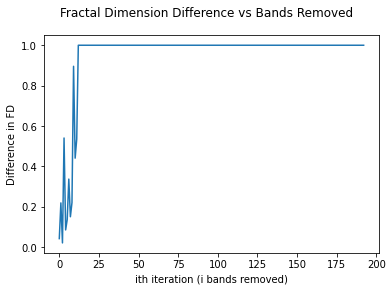

In [8]:
min_fd = np.min(diff, axis=1)
fig = plt.figure()
plt.plot(min_fd[:193])
fig.suptitle('Fractal Dimension Difference vs Bands Removed')
plt.xlabel('ith iteration (i bands removed)')
plt.ylabel('Difference in FD')
fig.savefig('/content/drive/My Drive/Major_Project/Results/Result2.jpg',dpi=300)

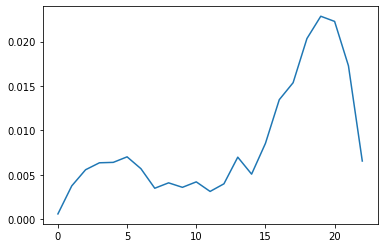

In [ ]:
from scipy.signal import savgol_filter
y = savgol_filter(a[170:193], 9,3)
fig1 = plt.figure()
plt.plot(y)
fig1.savefig('/content/drive/My Drive/Major_Project/Results/Result4.jpg',dpi=300)

In [ ]:
indexes = []
idx_original = 200
for i in range(bands-5):
  idx = np.argmin(diff[i,])
  if idx >= idx_original:
    indexes.append(idx+1)
  else:
    indexes.append(idx)
  idx_original = idx 
print(len(np.unique(indexes)))

97


In [ ]:
indexes_all = np.arange(200).tolist()
# indexes_c = 
list1 = [ele for ele in indexes_all if ele not in indexes] 
print(list1)
reduced_img = img


[16, 17, 25, 29, 32, 39, 40, 42, 43, 48, 51, 52, 53, 59, 60, 65, 68, 69, 70, 72, 73, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 89, 91, 92, 93, 94, 95, 98, 100, 101, 103, 104, 105, 109, 110, 111, 112, 113, 114, 117, 120, 125, 126, 127, 128, 130, 132, 135, 136, 137, 138, 139, 143, 149, 155, 156, 157, 158, 159, 160, 161, 164, 165, 170, 171, 172, 178, 179, 182, 184, 185, 191, 193, 194]


In [ ]:
saveme = img[:,[1,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160]]
print(saveme.shape)

(21025, 17)


In [ ]:
np.save('/content/drive/My Drive/Major_Project/Results/reduced.npy',saveme)